# Week 2: Principal Component Analysis

**Darren Lim** 

In this workshop, we will work through a set of problems on dimensionality reduction -- a cannonical form of unsupervised learning. Within the machine learning pipeline, dimensionality reduction is an important tool, which can used in EDA to understand patterns in the data, feature engineering to create a low-dimensional representation of the inputs, and/or in the final phase when you are presenting and visualizing your solution.

As usual, the worksheets will be completed in teams of 2-3, using **pair programming**, and we have provided cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.
>- In some Exercises, you will see some beneficial hints at the bottom of questions.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday of the week the workshop was given. 

As you work through the problems it will help to refer to your lecture notes (navigator). The exercises here are designed to reinforce the topics covered this week. Please discuss with the tutors if you get stuck, even early on! 

## Outline

1. [Problem Definition and Setup](#setup)

2. [Principal Component Analysis](#pca)

    a. [Examining the Basis Vectors and Scores](#basis)

    b. [Selecting the Number of Components](#nocomponents)

    c. [Other Digits](#other)

3. [Kernel PCA](#kpca)

# Problem Definition and Setup <a id='setup'></a>

## Packages

First, lets load in some packages to get us started. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data

Our dataset will be the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits, which we will download from sklearn. The dataset consists of a set of greyscale images of the numbers 0-9 and corresponding labels. Usually the goal is to train a classifier (i.e. given an image, what digit does it correspond to?). Here we will throw away the labels and focus on the images themselves. Specifically, we will use dimensionality reduction to explore the images and underlying patterns and find a low-dimensional representation.

First, load the data:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser = 'auto')
X = mnist.data
y = mnist.target

### 🚩 Exercise 1 (CORE)

What is stored in `X` and `y` in the command above? What is the shape/datatype etc if an array?


In [3]:
display(X.info())
display(y.info())
display(X.head())
display(y.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


None

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


None

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[5 rows x 784 columns]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

X stores a pandas DataFrame, which contains 70000 images (rows) and each image is described by the greyscale intensity of 784 pixels (columns), ranging from 0 (white) to 255 (black).

y stores a pandas Series, which labels each image with a number from 0 to 9, which is represented by the image.

Now, let's create a dictionary, with the digit classes (0-9) as keys, where the correponding values are the set of all images corresponding to that particular label. 

In [9]:
digits_dict = {}
X_= X.values
count = 0

for label in y:
  if label in digits_dict:
    digits_dict[label] += [X_[count]]
  else:
    digits_dict[label] = [X_[count]]
  count += 1

Next let's visualize some of the images. We will start by picking a label and plotting a few images from within the dictionary. Note that each image contains a total of 784 pixels (28 by 28) and we will need to `reshape` the image to plot with `imshow(...,cmap='gray_r')`. Try also changing the label to view different digits.

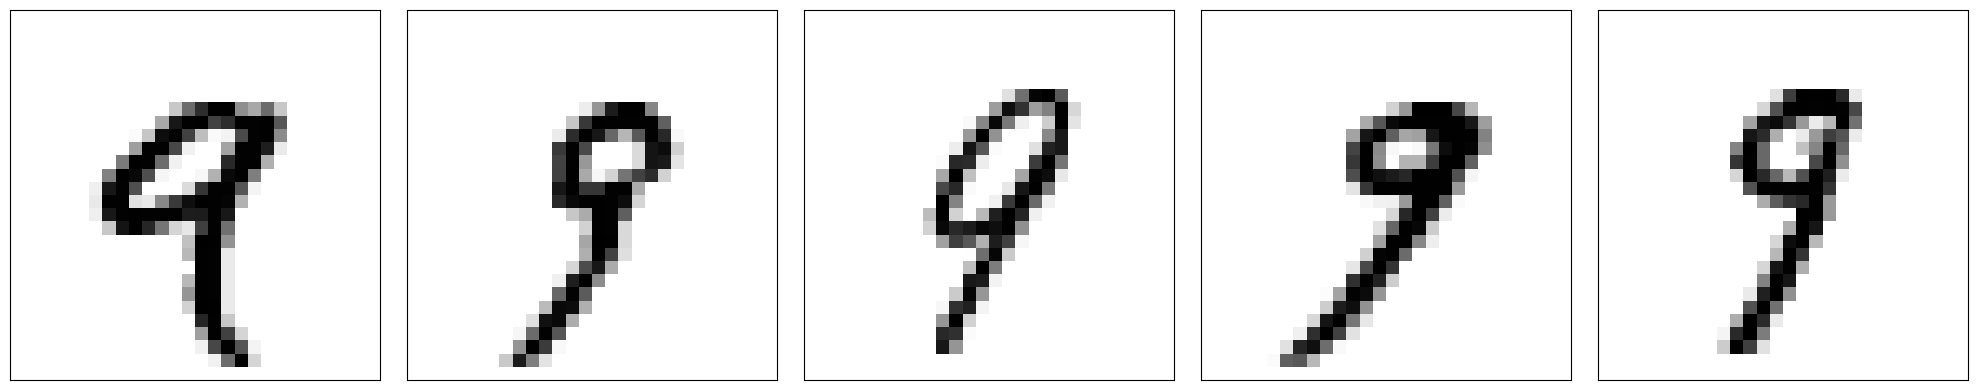

In [12]:
mylabel = '9'
n_images_per_label = 5

fig = plt.figure(figsize=(4*n_images_per_label, 4))
for j in range(n_images_per_label):
    ax_number = 1 + j
    ax = fig.add_subplot(1, n_images_per_label, ax_number)
    ax.imshow(digits_dict[mylabel][j].reshape((28,28)), cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

### 🚩 Exercise 2 (EXTRA)

Edit the code above to plot a few images for multiple labels.

<br>
<details><summary><b><u>Hint</b></u></summary>

Create a vector of labels and add additional for loop in the code above.
</details>

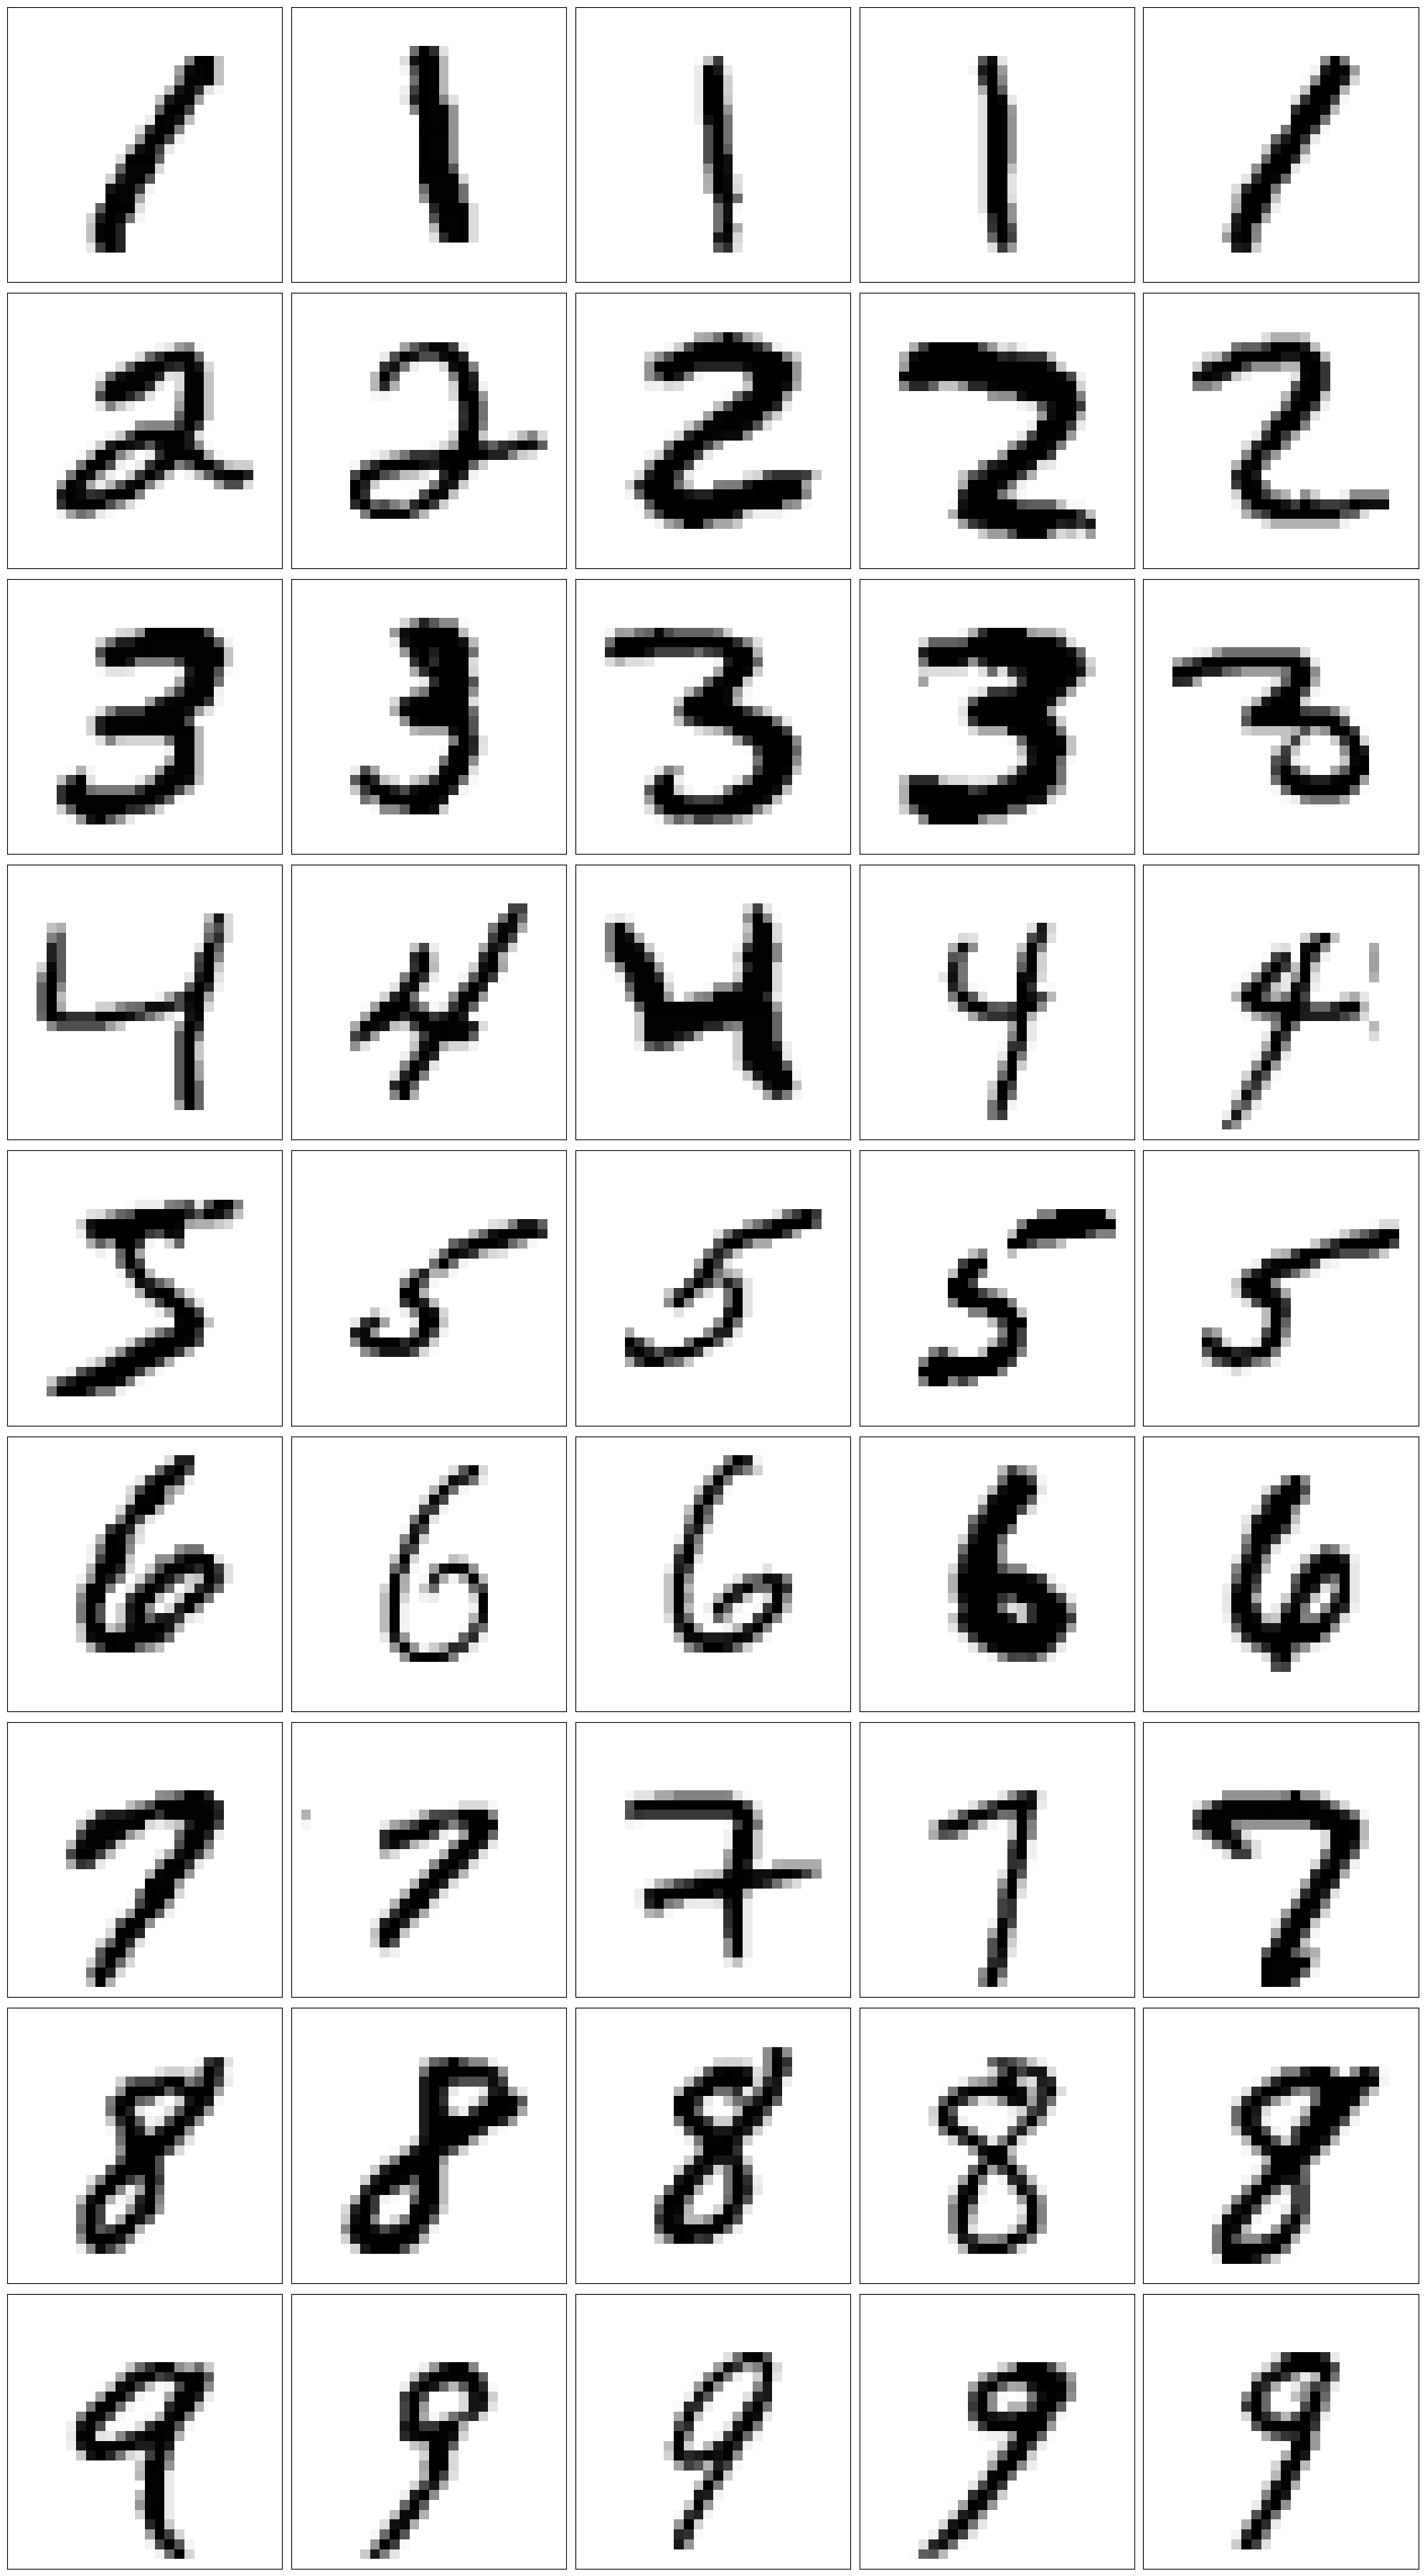

In [14]:
mylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
n_images_per_label = 5

fig = plt.figure(figsize=(4*n_images_per_label, 4*len(mylabels)))

for i, mylabel in enumerate(mylabels):
    for j in range(n_images_per_label):
        ax_number = i * n_images_per_label + j + 1
        ax = fig.add_subplot(len(mylabels), n_images_per_label, ax_number)
        ax.imshow(digits_dict[mylabel][j].reshape((28,28)), cmap='gray_r')
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()

### 🚩 Exercise 3 (CORE)

Now focus on the 3s only and create a data matrix called `X_threes`. Define also `N` (# datapoints) and `D` (# features).

What are the features in this problem? How many features and data points are there? 

In [21]:
X_labelled = X.copy()
X_labelled['label'] = y
X_threes = X_labelled[X_labelled.apply(lambda x: x['label'] == '3', axis = 1)].drop(columns = ['label']).reset_index(drop = True)
display(X_threes)

N = len(X_threes.index)
D = len(X_threes.columns)
print(f"There are {N} datapoints and {D} features.")

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7136       0       0       0       0       0       0       0       0       0   
7137       0       0       0       0       0       0       0       0       0   
7138       0       0       0       0       0       0       0       0       0   
7139       0       0       0       0       0       0       0       0       0   
7140       0       0       0       0       0       0       0       0       0   

      pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
7136        0  ...         0         0         0         0         0   
7137        0  ...         0         0         0         0         0   
7138        0  ...         0         0         0         0         0   
7139        0  ...         0         0         0         0         0   
7140        0  ...         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  pixel784  
0            0         0         0         0         0  
1            0         0         0         0         0  
2            0         0         0         0         0  
3            0         0         0         0         0  
4            0         0         0         0         0  
...        ...       ...       ...       ...       ...  
7136         0         0         0         0         0  
7137         0         0         0         0         0  
7138         0         0         0         0         0  
7139         0         0         0         0         0  
7140         0         0         0         0         0  

[7141 rows x 784 columns]

There are 7141 datapoints and 784 features.


The features are the greyscale intensities of each pixel.

There are 7141 datapoints and 784 features.

### 🚩 Exercise 4 (CORE)

Now compute and plot the mean image of three.

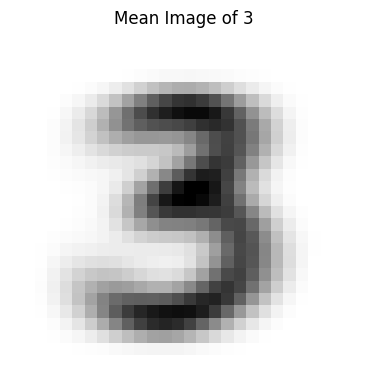

In [28]:
X_three_mean = X_threes.mean(axis = 0).to_numpy()

plt.figure(figsize=(4, 4))
plt.imshow(X_three_mean.reshape(28, 28), cmap='gray_r')
plt.title('Mean Image of 3', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

Run the following code to first create a new data matrix that centers the data by subtracting the mean image, and then visualise some of the images and compare to the original data. Note: you will need to replace `X_three_mean` with the name you gave the mean image in the computation above.

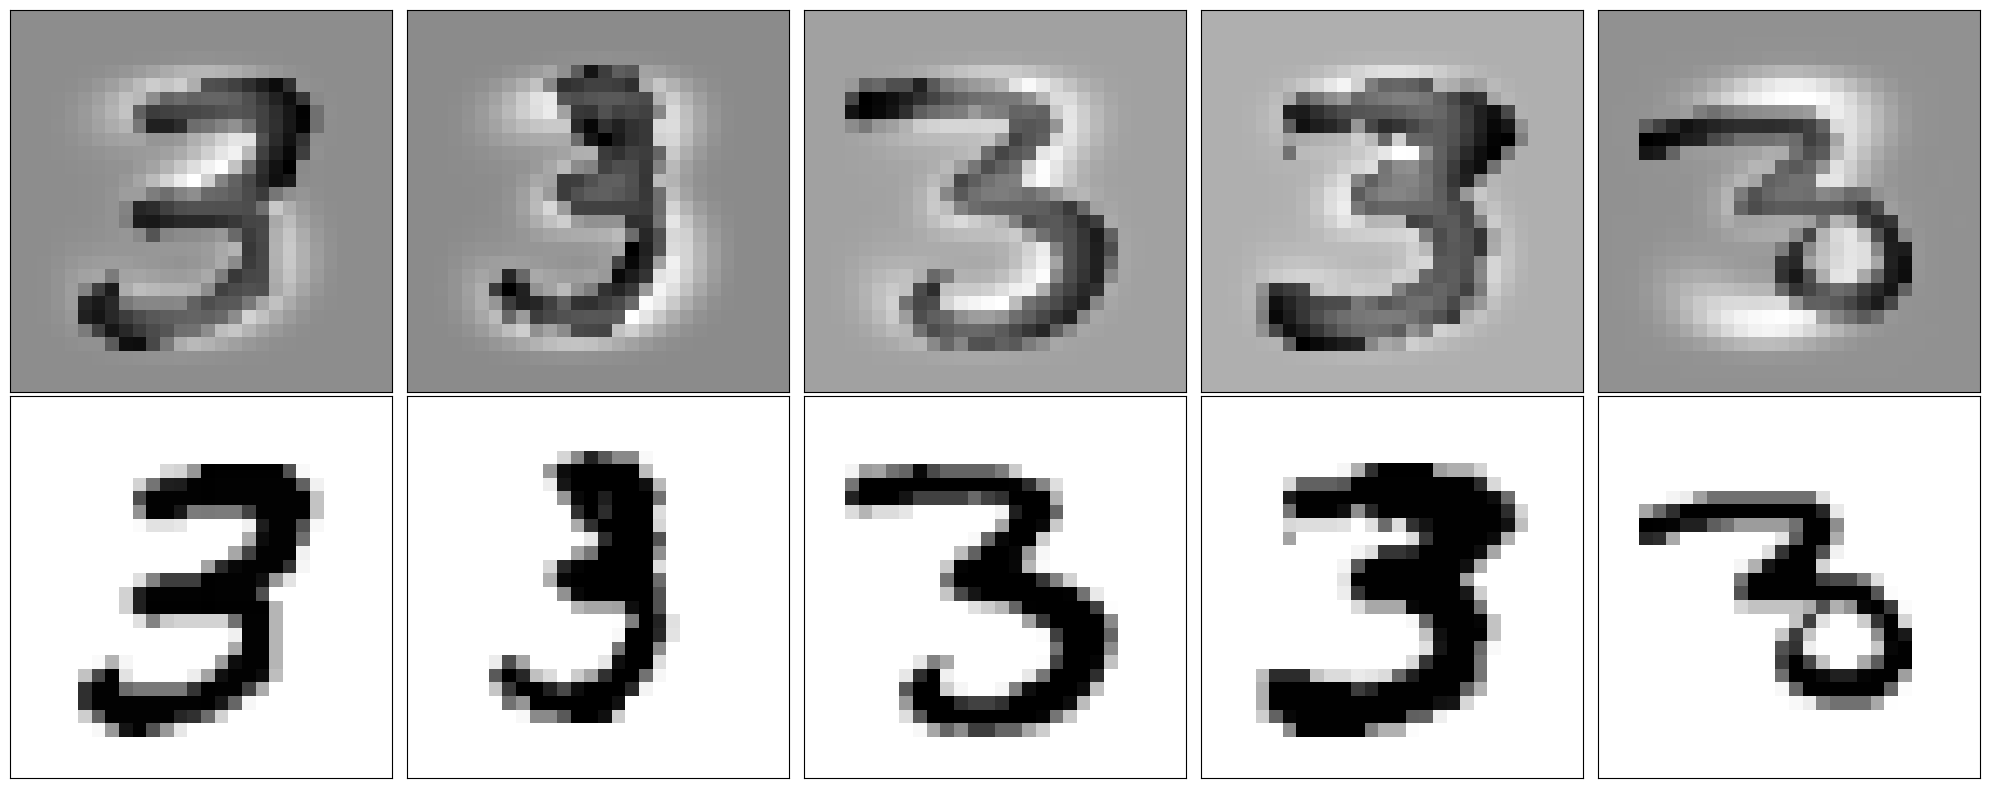

In [33]:
X_three_centred = X_threes - X_three_mean

n_images = 5

fig = plt.figure(figsize=(4*n_images, 4*2))
for j in range(n_images):
  ax = fig.add_subplot(2, n_images, j+1)
  ax.imshow(X_three_centred.iloc[j,:].to_numpy().reshape((28,28)), cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

  ax = fig.add_subplot(2, n_images, j+1+n_images)
  ax.imshow(X_threes.iloc[j,:].to_numpy().reshape((28,28)), cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()

### 🚩 Exercise 5 (CORE)

Comment on whether or not the images need to be standardized before using PCA

The images do not need to be standardised before using PCA as:

- All features (pixels) are already on the same scale (0-255 grayscale values)
- All features have the same units (pixel intensity)

🏁 **Now, is a good point to switch driver and navigator**

# PCA <a id='pca'></a>

Now, we will perform PCA to summarize the main patterns in the images. We will use the [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transformer from the `sklearn.decomposition` package:

- As we saw last week, we start by creating our transformer object, specifying any parameters as desired. For example, we can specify the number of components with the option `n_components`. If omitted, all components are kept.

- Note that by default the `PCA()` transform centers the variables to have zero mean (but does not scale them). 

- After calling `.fit()`, our fitted object has a number of attributes, including:
    - the mean accessible through the attribute `mean_`.
    - the basis vectors (principal components) accesible through the `components_` attribute.

- There are also a number of methods for the fitted object, including `.transform()` to obtain the low-dimensional representation (or also `fit_transform` combining both together). 

 First, let's create the PCA transformer object and call `.fit()`:

In [34]:
pca_threes = PCA(n_components = 200)
pca_threes.fit(X_threes)

PCA(n_components=200)

## Examining the Basis Vectors and Scores <a id='basis'></a>

### 🚩 Exercise 6 (EXTRA)
 
Plot the mean image by accessing the `mean_` attribute and check that it is the same as above.

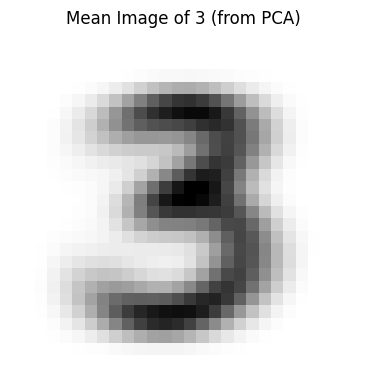

np.allclose(X_three_mean, pca_threes.mean_) -> True


In [36]:
plt.figure(figsize=(4, 4))
plt.imshow(pca_threes.mean_.reshape(28, 28), cmap='gray_r')
plt.title('Mean Image of 3 (from PCA)', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

print("np.allclose(X_three_mean, pca_threes.mean_) ->", np.allclose(X_three_mean, pca_threes.mean_))

### 🚩 Exercise 7 (CORE)

Plot the the first four basis vectors as images by accessing the `components_` attribute. What patterns do they seem describe? 

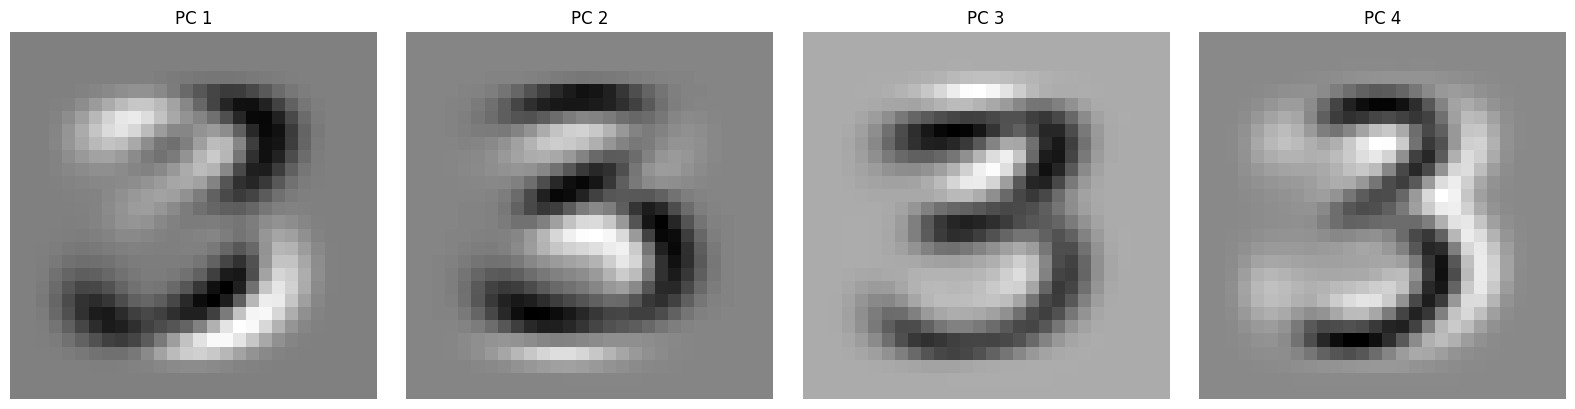

In [39]:
n_components_to_plot = 4

fig, axes = plt.subplots(1, n_components_to_plot, figsize=(4*n_components_to_plot, 4))

for i in range(n_components_to_plot):
    axes[i].imshow(pca_threes.components_[i].reshape(28, 28), cmap='gray_r')
    axes[i].set_title(f'PC {i+1}', fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The first four principal components typically capture:

- PC1 (First component): The most common variation among digit "3"s, which often captures the overall shape variation, such as differences in thickness, slant, or the size of the upper and lower loops
- PC2 (Second component): The second most important variation, which might capture things like whether the "3" is more rounded vs. angular, or variations in how the top and bottom curves connect
- PC3 (Third component): More subtle variations, which could represent differences in writing style like the tightness of curves or the position of the middle junction
- PC4 (Fourth component): Even more specific details, which might capture minor stylistic differences or specific stroke patterns

Each component looks like a "pattern of difference" rather than a clear digit

Lighter and darker regions show where pixels vary positively or negatively from the mean

Together, these components capture the main ways that different "3"s differ from the average "3"

Higher-numbered components (PC5, PC6, etc.) capture increasingly subtle and specific variations

### 🚩 Exercise 8 (CORE)

a) Use the `transform()` method to compute the PCA scores and save them in an object called `scores`. Then, plot the data points in the low-dimensional space spanned by the first two principal components. 

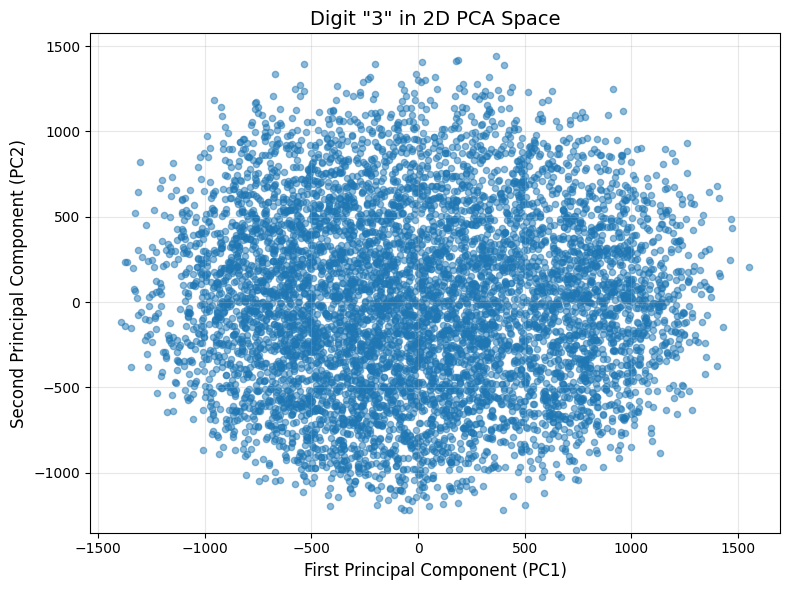

In [40]:
scores = pca_threes.transform(X_threes)

plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5, s=20)
plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Second Principal Component (PC2)', fontsize=12)
plt.title('Digit "3" in 2D PCA Space', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

To better interpret the latent dimensions, let's look at some projected points along each dimension and the corresponding images. Specifically, run the following code to:

- first compute the $5, 25, 50, 75, 95\%$ quantiles of the scores for the first two dimensions
- then find the data point whose projection is closest to each combination of quantiles.

In [43]:
s1q = np.quantile(scores[:,0],[.05,.25,.5,.75,.95])
s2q = np.quantile(scores[:,1],[.05,.25,.5,.75,.95])

idx = np.zeros([len(s1q),len(s2q)])

for i in range(len(s1q)):
    for j in range(len(s2q)):
        aux = ((scores[:,0] - s1q[i])**2 + (scores[:,1] - s2q[j])**2).reshape(N,1)
        idx[i,j] = np.where(aux == min(aux))[0][0]

idx = idx.astype(int)

b) Now, add these points in red to your plot above in.

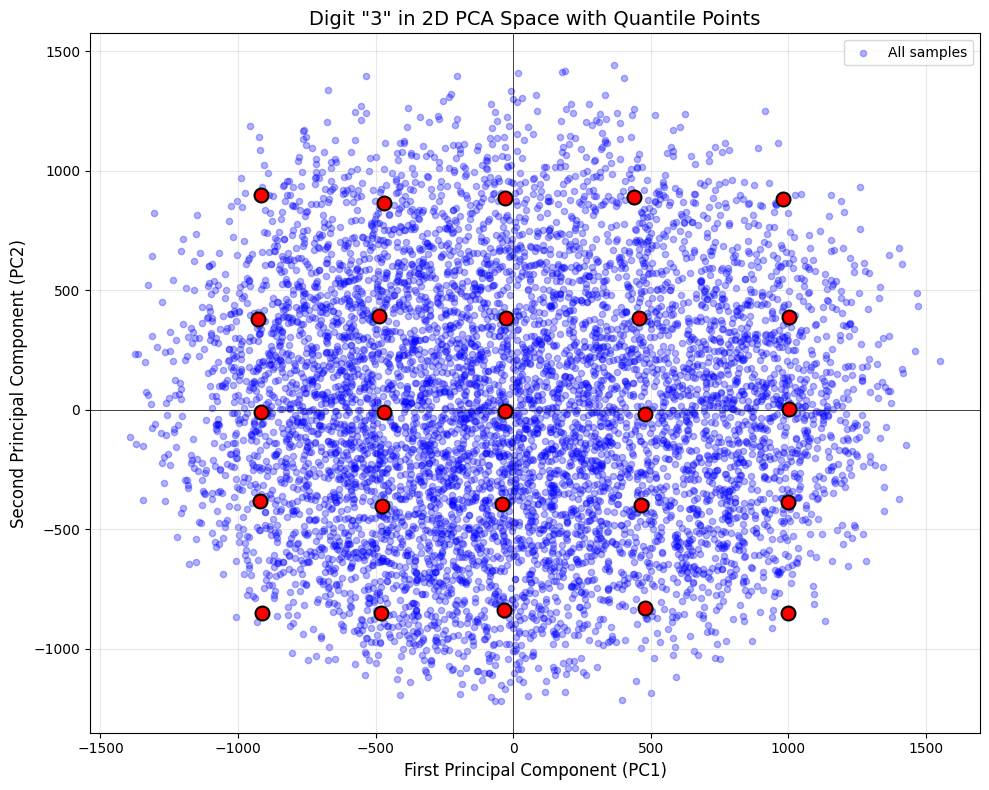

In [44]:
plt.figure(figsize=(10, 8))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.3, s=20, c='blue', label='All samples')

for i in range(len(s1q)):
    for j in range(len(s2q)):
        point_idx = idx[i, j]
        plt.scatter(scores[point_idx, 0], scores[point_idx, 1], 
                   c='red', s=100, marker='o', edgecolors='black', linewidth=1.5,
                   zorder=5)

plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Second Principal Component (PC2)', fontsize=12)
plt.title('Digit "3" in 2D PCA Space with Quantile Points', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

c) Run the following code to plot the images corresponding to this grid of points. Describe the general pattern of the first (left to right) and second (down to up) principal component.

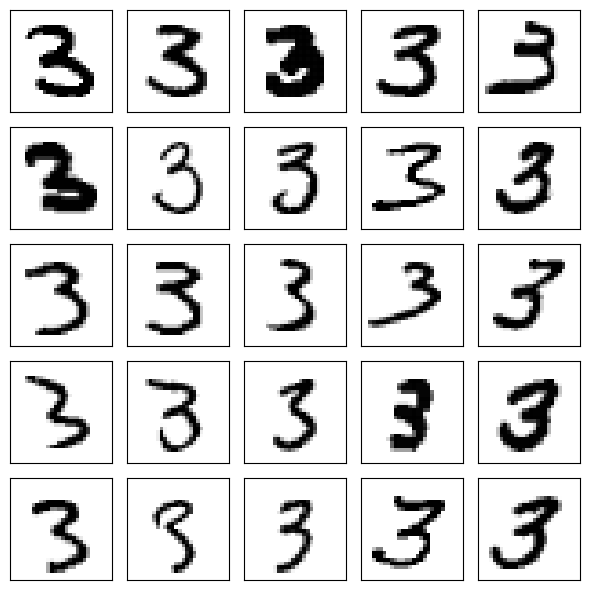

In [47]:
fig, ax = plt.subplots(len(s1q),len(s2q),figsize=(6,6))
for i in range(len(s1q)):
    for j in range(len(s2q)):
        ax[len(s2q)-1-j,i].imshow(X_threes.iloc[idx[i,j],:].to_numpy().reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()

First Principal Component (left to right) captures the most significant variation, likely related to:

- Thickness of strokes (thin vs. thick)
- Slant/angle (leaning left vs. right)
- Overall size or scale of the digit

Second Principal Component (bottom to top) captures the second most important variation, likely related to:

- Roundness of curves (angular vs. smooth curves)
- Height ratio between top and bottom loops
- Connection style at the middle junction
- Openness of the curves

The center image should look like the most "average" 3, while corners represent extreme combinations of both variations.

You can also try to create some artificial images, by fixing different values of the weights. This can also help to interpret the latent dimensions. 

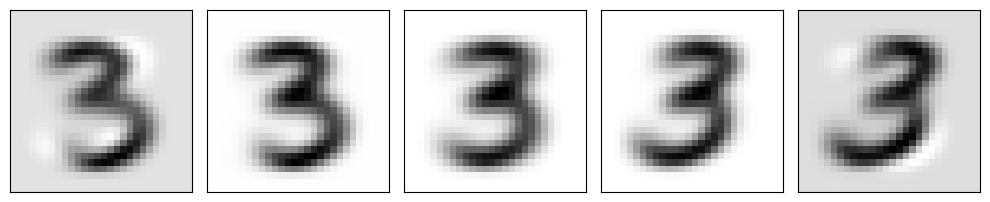

In [57]:
weight1 = np.quantile(scores[:,0],[.05,.25,.5,.75,.95])
weight2 = 0

images_pc1 = np.zeros([len(weight1),D])

count = 0
for w in weight1:   
    images_pc1[count,:] =(pca_threes.mean_ + pca_threes.components_[0,:]*w+pca_threes.components_[1,:]*weight2)
    count += 1
    

fig, ax = plt.subplots(1,len(weight1),figsize=(10,6))
for i in range(len(weight1)):
    ax[i].imshow(images_pc1[i,:].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()

### 🚩 Exercise 9 (CORE)

Repeat this to describe the third principal component. 

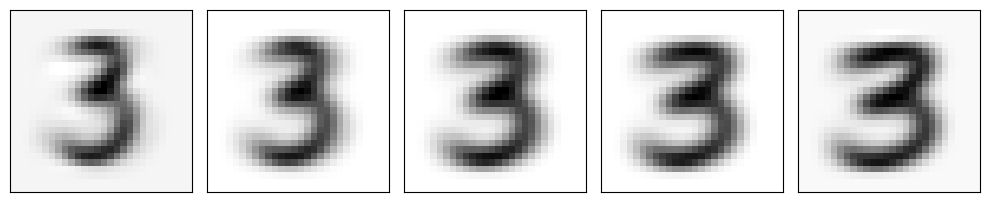

In [58]:
weight1 = 0
weight2 = 0
weight3 = np.quantile(scores[:,2], [.05, .25, .5, .75, .95])

images_pc3 = np.zeros([len(weight3), D])

count = 0
for w in weight3:   
    images_pc3[count,:] = (pca_threes.mean_ + 
                           pca_threes.components_[0,:]*weight1 + 
                           pca_threes.components_[1,:]*weight2 + 
                           pca_threes.components_[2,:]*w)
    count += 1
    
fig, ax = plt.subplots(1, len(weight3), figsize=(10, 6))
for i in range(len(weight3)):
    ax[i].imshow(images_pc3[i,:].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

Third Principal Component seems to capture more subtle and specific variations in the digit "3" compared to PC1 and PC2, likely related to:

- Vertical positioning or centering
- Compactness vs. elongation
- Top-to-bottom loop balance
- Middle junction characteristics
- Fine-grained stroke details

### 🚩 Exercise 10 (EXTRA)

In lecture, we saw that we can also compute the basis vectors from an SVD decomposition of the data matrix. Use the `svd` function in `scipy.linalg` to compute the first three basis vectors and verify that they are the same (up to a change in sign -- note that the signs may be flipped because each principal component specifies a direction in the $D$-dimensional space and flipping the sign has no effect as the direction does not change). 

Does `PCA()` perform principal component analysis using an eigendecomposition of the empirical covariance matrix or using a SVD decomposition of the data matrix?

Comparison of first 3 principal components:

PC1: Match (correlation = -1.000000)
      -> Signs are flipped
PC2: Match (correlation = -1.000000)
      -> Signs are flipped
PC3: Match (correlation = -1.000000)
      -> Signs are flipped


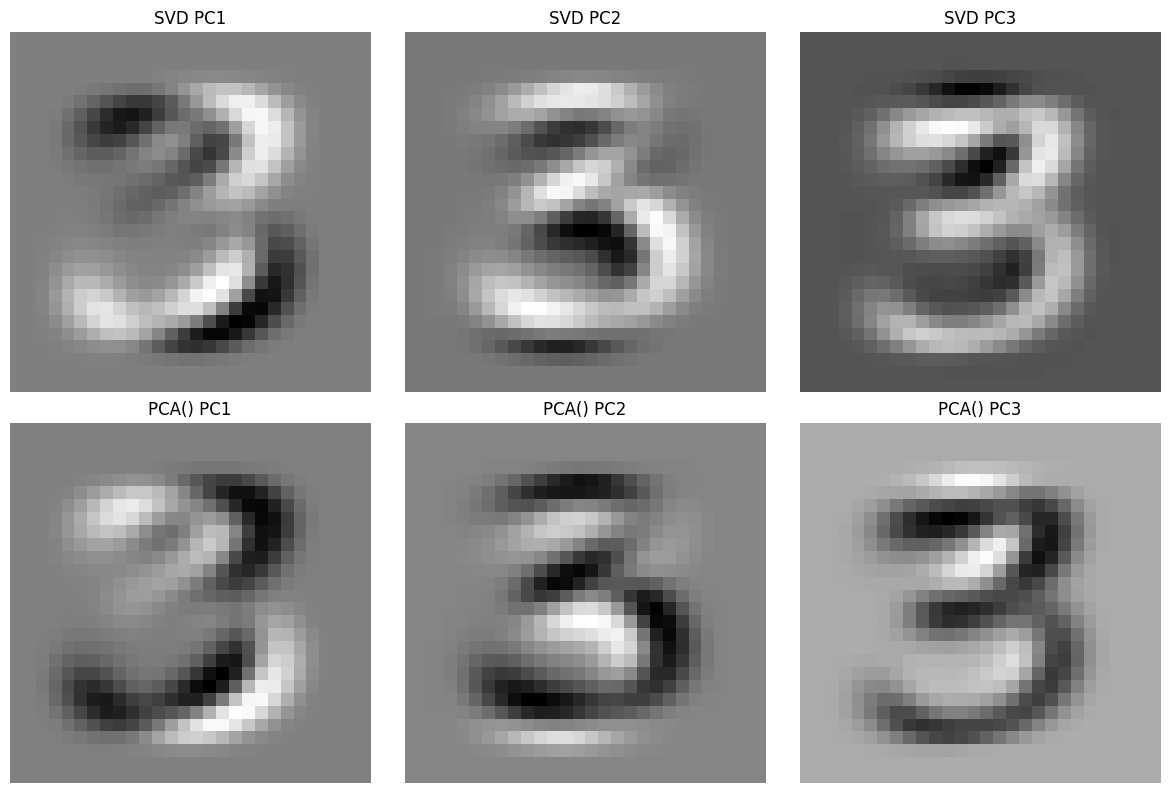

In [60]:
from scipy.linalg import svd

U, S, Vt = svd(X_three_centred.to_numpy(), full_matrices=False)

svd_components = Vt[:3, :]

pca_components = pca_threes.components_[:3, :]

print("Comparison of first 3 principal components:\n")
for i in range(3):
    dot_product = np.dot(svd_components[i], pca_components[i])
    if np.abs(dot_product) > 0.99:
        print(f"PC{i+1}: Match (correlation = {dot_product:.6f})")
        if dot_product < 0:
            print(f"      -> Signs are flipped")
    else:
        print(f"PC{i+1}: No match (correlation = {dot_product:.6f})")

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(3):
    axes[0, i].imshow(svd_components[i].reshape(28, 28), cmap='gray_r')
    axes[0, i].set_title(f'SVD PC{i+1}', fontsize=12)
    axes[0, i].axis('off')
    
    axes[1, i].imshow(pca_components[i].reshape(28, 28), cmap='gray_r')
    axes[1, i].set_title(f'PCA() PC{i+1}', fontsize=12)
    axes[1, i].axis('off')

axes[0, 0].set_ylabel('SVD', fontsize=14, rotation=0, labelpad=40, va='center')
axes[1, 0].set_ylabel('PCA()', fontsize=14, rotation=0, labelpad=40, va='center')

fig.tight_layout()
plt.show()

PCA() uses SVD decomposition of the data matrix, not eigendecomposition of the covariance matrix.

🏁 **Now, is a good point to switch driver and navigator**

## Selecting the Number of Components <a id='nocomponents'></a>

### 🚩 Exercise 11 (CORE)

Next, let's investigate how many components are needed by considering how much variance is explained by each component.

Note that the `pca_threes` object has an attribute `explained_variance_` (variance of each component) and `explained_variance_ratio_` (proportion of variance explained by each component). 

Plot both the proportion of variance explained and the cummulative proportion of variance explained. Provide a suggestion of how many components to use. How much variance is explained by the suggest number of components? Comment on why we may be able to use this number of components in relation to the total number of features.

<br>
<details><summary><b><u>Hint</b></u></summary>

You can use `cumsum()` to compute the cummulative sum of the elements in a vector.
</details>

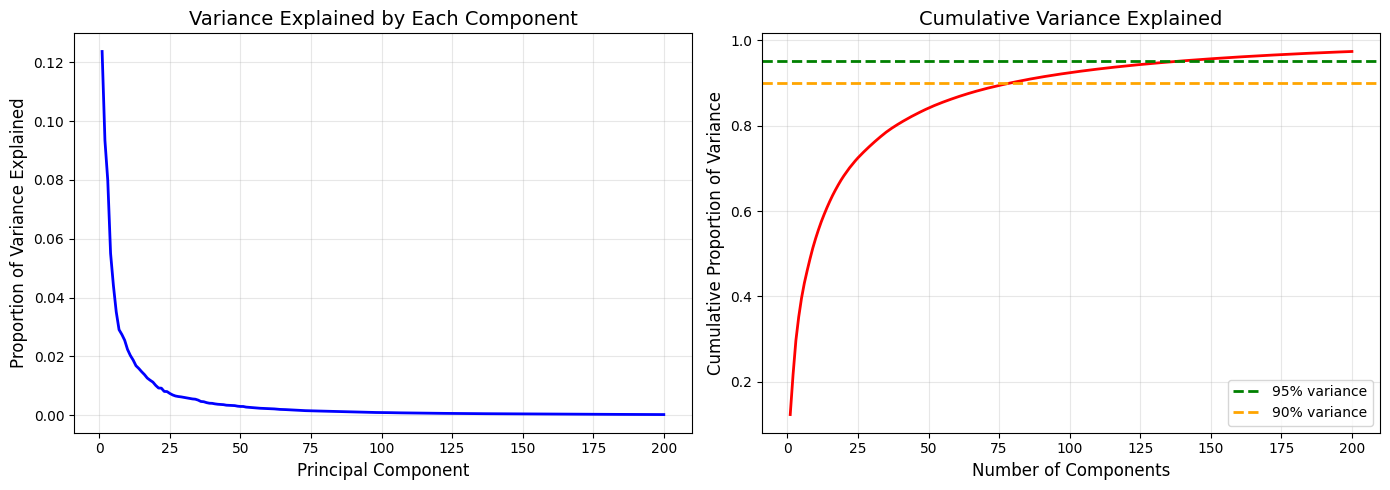

Number of components needed:
  90% variance: 80 components (explains 0.9011)
  95% variance: 138 components (explains 0.9504)
  99% variance: 1 components (explains 0.1237)

Total number of features: 784
Dimensionality reduction: 784 → 138 (factor of 5.7)


In [61]:
explained_variance_ratio = pca_threes.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'b-', linewidth=2)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Proportion of Variance Explained', fontsize=12)
axes[0].set_title('Variance Explained by Each Component', fontsize=14)
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'r-', linewidth=2)
axes[1].axhline(y=0.95, color='green', linestyle='--', label='95% variance', linewidth=2)
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% variance', linewidth=2)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Proportion of Variance', fontsize=12)
axes[1].set_title('Cumulative Variance Explained', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Number of components needed:")
print(f"  90% variance: {n_components_90} components (explains {cumulative_variance[n_components_90-1]:.4f})")
print(f"  95% variance: {n_components_95} components (explains {cumulative_variance[n_components_95-1]:.4f})")
print(f"  99% variance: {n_components_99} components (explains {cumulative_variance[n_components_99-1]:.4f})")
print(f"\nTotal number of features: {X_threes.shape[1]}")
print(f"Dimensionality reduction: {X_threes.shape[1]} → {n_components_95} (factor of {X_threes.shape[1]/n_components_95:.1f})")

Suggested number of components: ~50-80 components (to capture 95% of variance)

- Redundancy in images: Handwritten digits have highly correlated pixels. Neighboring pixels tend to have similar values, creating redundancy
- Low intrinsic dimensionality: Although images have 784 features (28×28 pixels), the actual variability in handwritten "3"s lies in a much lower-dimensional space defined by:
    - Thickness, slant, size
    - Curve shapes and proportions
    - Writing style variations
- Smooth variations: Natural images have smooth gradients, not random pixel patterns, so nearby pixels are predictable from each other
- Structured data: Handwritten digits follow common patterns and constraints (they must look like the digit), so they do not explore all possible combinations of 784 pixel values

Original: 784 dimensions

Reduced: ~50-80 dimensions (capturing 95% variance)

Compression ratio: ~10-15× with minimal information loss

This massive reduction is possible because handwritten digits occupy a low-dimensional manifold in the high-dimensional pixel space.

### 🚩 Exercise 12 (CORE)

For your selected number of components, compute the reconstructed images. Plot the reconstruction for a few images and compare with the original images. Comment on the results.  

<br>
<details><summary><b><u>Hint</b></u></summary>

You can use `inverse_transform()` to decode the scores.
</details>

Using 138 components (explains 95.04% variance)


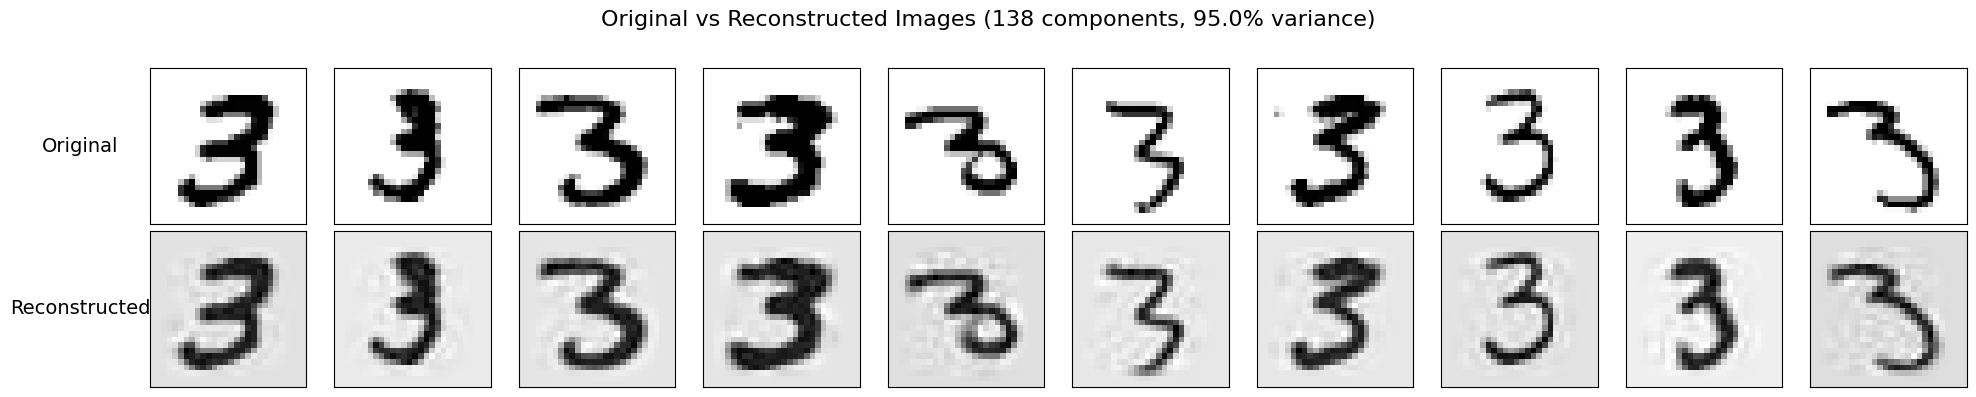


Mean Squared Reconstruction Error: 185.360002


In [62]:
n_components_selected = n_components_95

print(f"Using {n_components_selected} components (explains {cumulative_variance[n_components_selected-1]:.2%} variance)")

pca_reduced = PCA(n_components=n_components_selected)
pca_reduced.fit(X_threes)

X_threes_transformed = pca_reduced.transform(X_threes)
X_threes_reconstructed = pca_reduced.inverse_transform(X_threes_transformed)

n_images = 10

fig, axes = plt.subplots(2, n_images, figsize=(20, 4))

for i in range(n_images):
    axes[0, i].imshow(X_threes.iloc[i, :].to_numpy().reshape(28, 28), cmap='gray_r')
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    if i == 0:
        axes[0, i].set_ylabel('Original', fontsize=14, rotation=0, labelpad=50, va='center')
    
    axes[1, i].imshow(X_threes_reconstructed[i, :].reshape(28, 28), cmap='gray_r')
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    if i == 0:
        axes[1, i].set_ylabel('Reconstructed', fontsize=14, rotation=0, labelpad=50, va='center')

fig.suptitle(f'Original vs Reconstructed Images ({n_components_selected} components, {cumulative_variance[n_components_selected-1]:.1%} variance)', 
             fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

reconstruction_error = np.mean((X_threes.to_numpy() - X_threes_reconstructed)**2)
print(f"\nMean Squared Reconstruction Error: {reconstruction_error:.6f}")

With ~50-80 components (95% variance):

- Visual quality: The reconstructed images are visually very similar to the originals. The overall shape, thickness, and style of the digit "3" are preserved well.
- Fine details: Some subtle details are lost: very fine strokes, slight irregularities, or pixel-level noise may be smoothed out, but the essential character of each digit remains intact.
- Smoothing effect: The reconstruction appears slightly smoother than the original because high-frequency noise (captured by higher-order components) is removed. This can actually be beneficial as it acts like denoising.
- Trade-off: We achieve ~10-15× dimensionality reduction (784 -> 50-80) while maintaining 95% of the variance, which is an excellent compression ratio for minimal perceptual quality loss.

🏁 **Now, is a good point to switch driver and navigator**

## Other Digits <a id='other'></a>

Now, let's consider another digit. 

### 🚩 Exercise 13 (CORE)

Perform PCA for another choice of digit. What do the first two components describe? Do some digits have better approximations than others? Comment on why this may be.

Number of 0 images: 6903


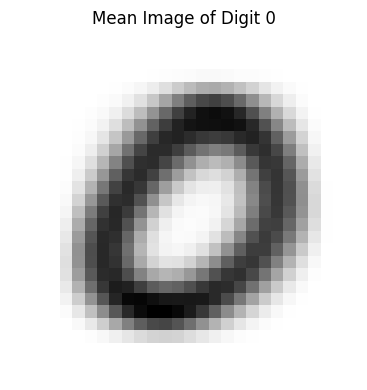

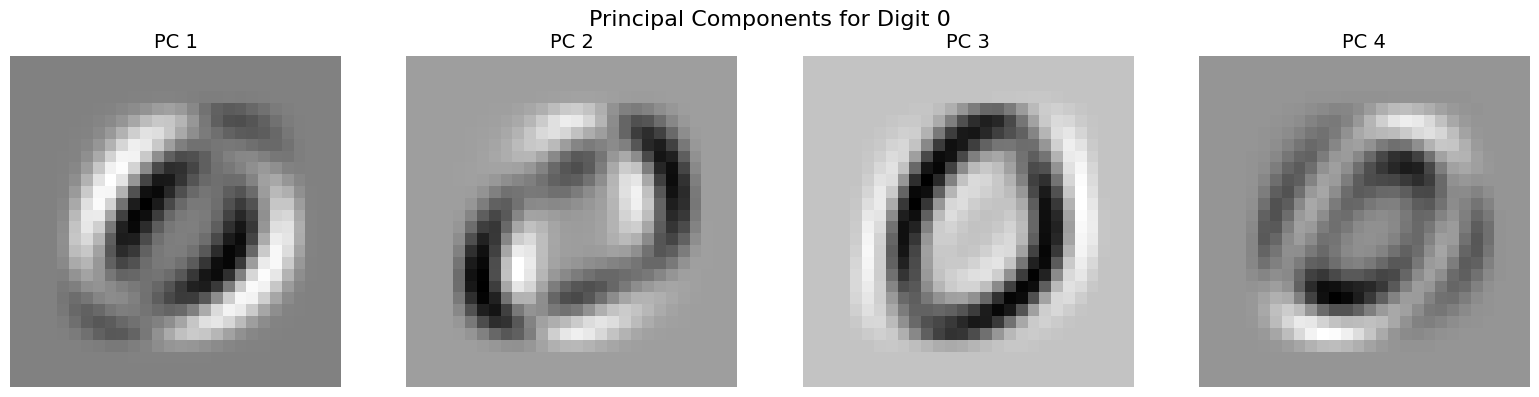

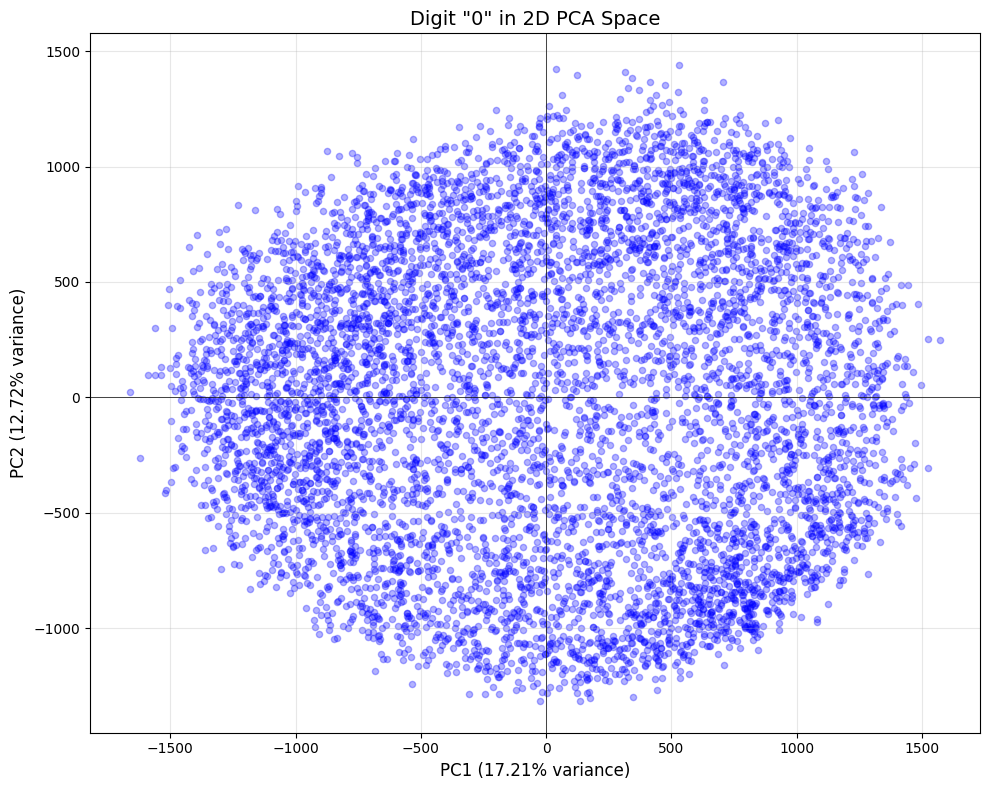

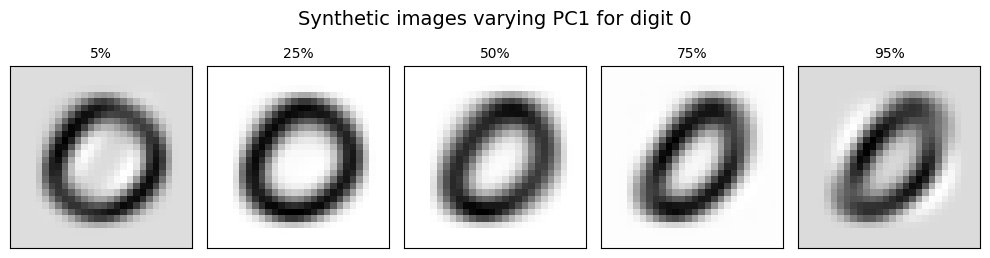

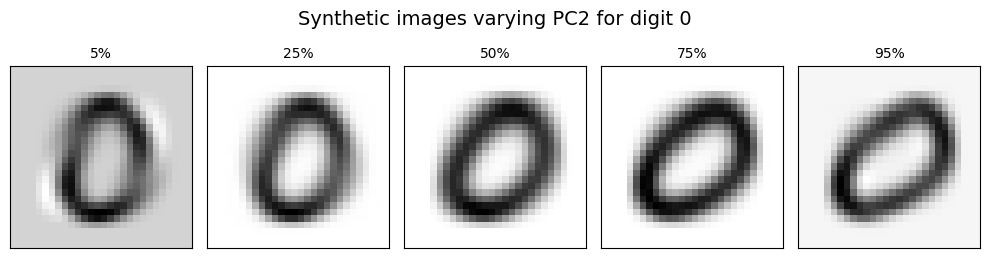

In [63]:
mylabel = '0'

# Filter data for digit 0
X_ones = X_labelled[X_labelled['label'] == mylabel].drop(columns=['label'])

print(f"Number of {mylabel} images: {X_ones.shape[0]}")

# Fit PCA with 200 components
pca_ones = PCA(n_components=200)
pca_ones.fit(X_ones)

# Plot mean image
plt.figure(figsize=(4, 4))
plt.imshow(pca_ones.mean_.reshape(28, 28), cmap='gray_r')
plt.title(f'Mean Image of Digit {mylabel}', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot first 4 principal components
n_components_to_plot = 4
fig, axes = plt.subplots(1, n_components_to_plot, figsize=(16, 4))

for i in range(n_components_to_plot):
    axes[i].imshow(pca_ones.components_[i].reshape(28, 28), cmap='gray_r')
    axes[i].set_title(f'PC {i+1}', fontsize=14)
    axes[i].axis('off')

plt.suptitle(f'Principal Components for Digit {mylabel}', fontsize=16)
plt.tight_layout()
plt.show()

# Transform and plot in 2D space
scores_ones = pca_ones.transform(X_ones)

plt.figure(figsize=(10, 8))
plt.scatter(scores_ones[:, 0], scores_ones[:, 1], alpha=0.3, s=20, c='blue')
plt.xlabel(f'PC1 ({pca_ones.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_ones.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title(f'Digit "{mylabel}" in 2D PCA Space', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

# Create synthetic images for PC1 and PC2
D = X_ones.shape[1]

# PC1 variation
weight1 = np.quantile(scores_ones[:,0], [.05, .25, .5, .75, .95])
weight2 = 0

images_pc1 = np.zeros([len(weight1), D])
for count, w in enumerate(weight1):   
    images_pc1[count,:] = pca_ones.mean_ + pca_ones.components_[0,:]*w + pca_ones.components_[1,:]*weight2

fig, ax = plt.subplots(1, len(weight1), figsize=(10, 2.5))
quantile_labels = ['5%', '25%', '50%', '75%', '95%']
for i in range(len(weight1)):
    ax[i].imshow(images_pc1[i,:].reshape((28,28)), cmap='gray_r')
    ax[i].set_title(quantile_labels[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.suptitle(f'Synthetic images varying PC1 for digit {mylabel}', fontsize=14, y=1.02)
fig.tight_layout()
plt.show()

# PC2 variation
weight1 = 0
weight2 = np.quantile(scores_ones[:,1], [.05, .25, .5, .75, .95])

images_pc2 = np.zeros([len(weight2), D])
for count, w in enumerate(weight2):   
    images_pc2[count,:] = pca_ones.mean_ + pca_ones.components_[0,:]*weight1 + pca_ones.components_[1,:]*w

fig, ax = plt.subplots(1, len(weight2), figsize=(10, 2.5))
for i in range(len(weight2)):
    ax[i].imshow(images_pc2[i,:].reshape((28,28)), cmap='gray_r')
    ax[i].set_title(quantile_labels[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.suptitle(f'Synthetic images varying PC2 for digit {mylabel}', fontsize=14, y=1.02)
fig.tight_layout()
plt.show()

Principal Component 1 likely captures the slant/angle (vertical vs. leaning left/right) of the stroke

Principal Component 2 probably captures the stroke style (straight vs. curved)

Digits with simpler, more constrained structure require fewer principal components to capture their variation, such as "1" and "0"

Complex digits with more stylistic freedom need more components for accurate reconstruction, such as "8" and "5"

### Exercise 14 (EXTRA)

Finally, consider now two digits of your choice (edit the code below if you wish to pick different digits).


In [64]:
# Extract data 
X_twodigits = np.concatenate((digits_dict['3'], digits_dict['8']))
N, D = X_twodigits.shape

Run the following code to compute and plot the mean and some of the principle components for this dataset. 

In [65]:
# Fit PCA
pca_digits = PCA(n_components = 50)
pca_digits.fit(X_twodigits)

PCA(n_components=50)

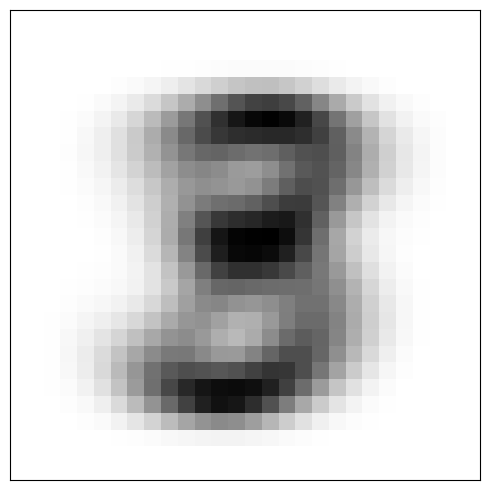

In [66]:
# Plot the mean image
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(pca_digits.mean_.reshape(28, 28), cmap='gray_r')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()

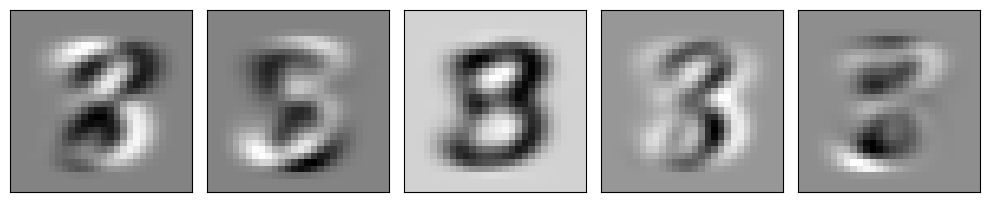

In [67]:
# Plot basis vectors
n_plot = 5
fig, ax = plt.subplots(1,5,figsize=(10,4))
for n in range(n_plot):
  ax[n].imshow(pca_digits.components_[n,:].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()

Plot the projection of the data in the latent space and color the data by the labels. What do you observe?

Total samples: 13966, Features: 784
Digit 3: 7141 samples, Digit 8: 6825 samples


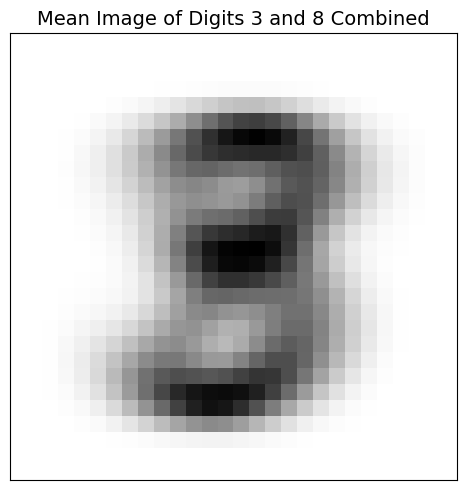

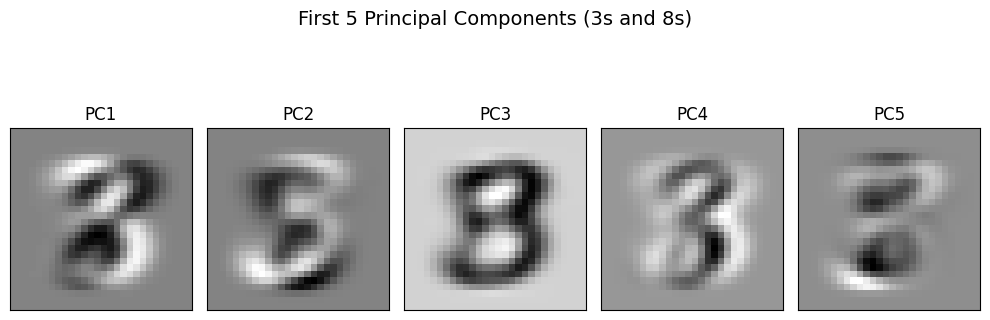

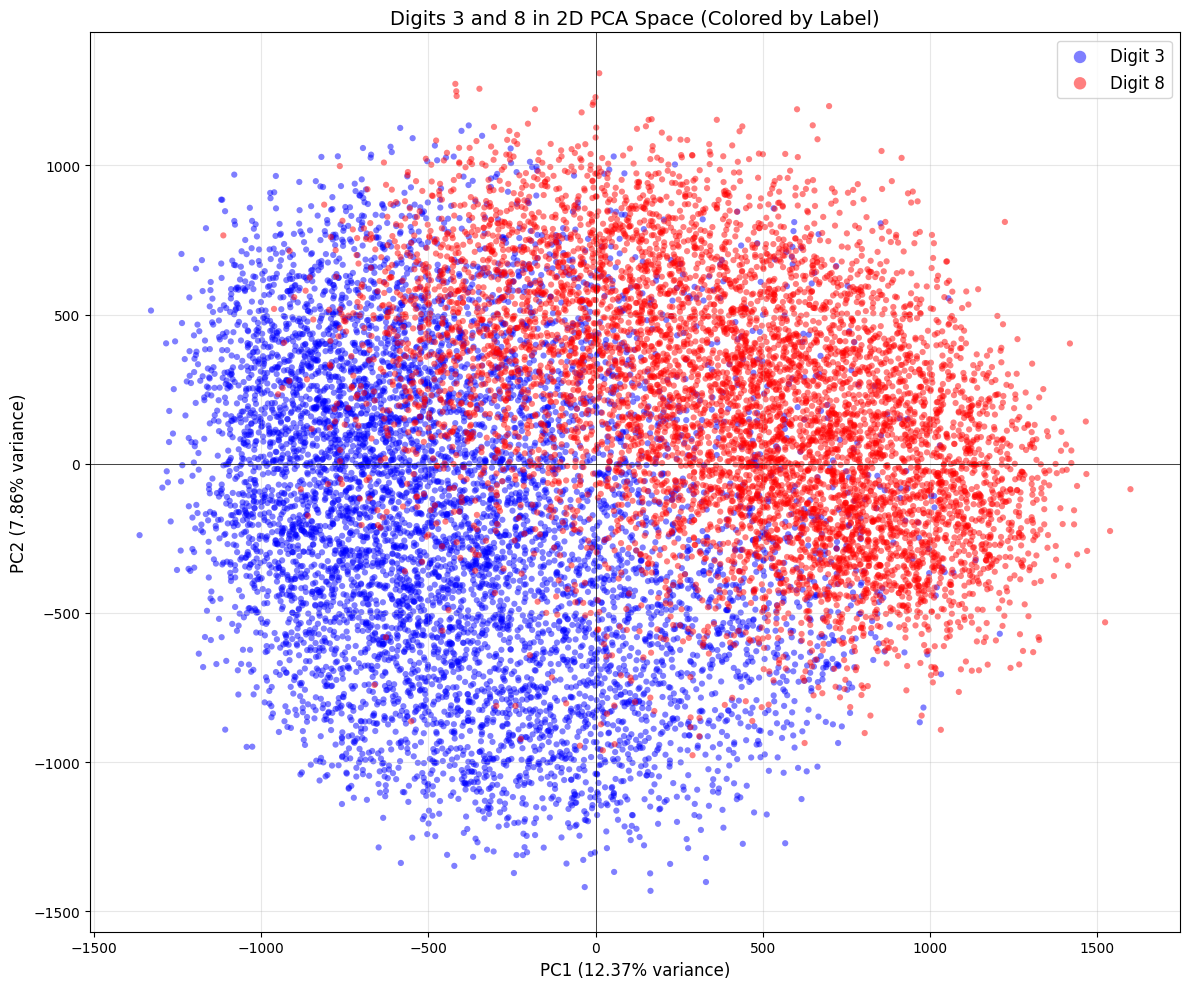

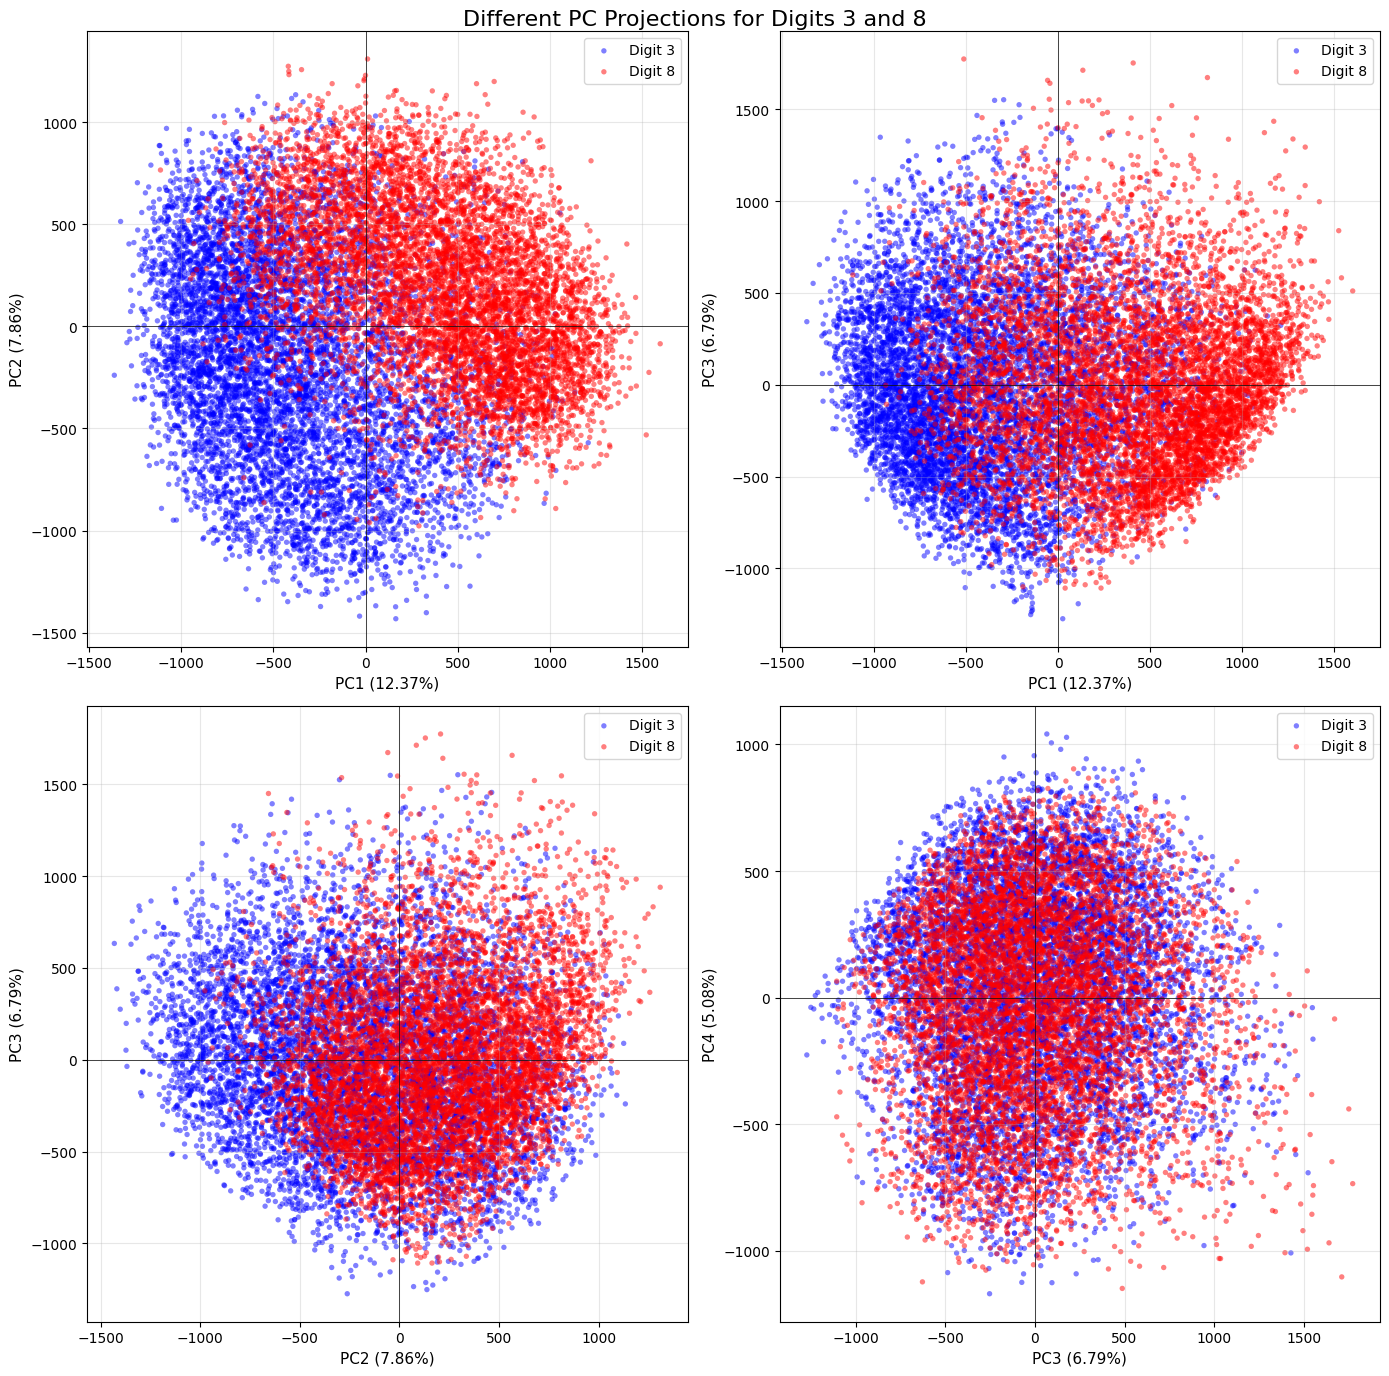

In [68]:
# Extract data for digits 3 and 8
X_digit3 = X_labelled[X_labelled['label'] == '3'].drop(columns=['label'])
X_digit8 = X_labelled[X_labelled['label'] == '8'].drop(columns=['label'])

X_twodigits = pd.concat([X_digit3, X_digit8], axis=0)
labels_twodigits = np.concatenate([np.full(len(X_digit3), '3'), np.full(len(X_digit8), '8')])

N, D = X_twodigits.shape
print(f"Total samples: {N}, Features: {D}")
print(f"Digit 3: {len(X_digit3)} samples, Digit 8: {len(X_digit8)} samples")

# Fit PCA
pca_digits = PCA(n_components=50)
pca_digits.fit(X_twodigits)

# Plot the mean image
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(pca_digits.mean_.reshape(28, 28), cmap='gray_r')
ax.set_title('Mean Image of Digits 3 and 8 Combined', fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
plt.show()

# Plot basis vectors
n_plot = 5
fig, ax = plt.subplots(1, n_plot, figsize=(10, 4))
for n in range(n_plot):
    ax[n].imshow(pca_digits.components_[n,:].reshape((28,28)), cmap='gray_r')
    ax[n].set_title(f'PC{n+1}', fontsize=12)
plt.setp(ax, xticks=[], yticks=[])
fig.suptitle('First 5 Principal Components (3s and 8s)', fontsize=14)
fig.tight_layout()
plt.show()

# Transform to get scores
scores_twodigits = pca_digits.transform(X_twodigits)

# Plot projection colored by labels
plt.figure(figsize=(12, 10))

# Separate by digit
mask_3 = labels_twodigits == '3'
mask_8 = labels_twodigits == '8'

plt.scatter(scores_twodigits[mask_3, 0], scores_twodigits[mask_3, 1], 
           alpha=0.5, s=20, c='blue', label='Digit 3', edgecolors='none')
plt.scatter(scores_twodigits[mask_8, 0], scores_twodigits[mask_8, 1], 
           alpha=0.5, s=20, c='red', label='Digit 8', edgecolors='none')

plt.xlabel(f'PC1 ({pca_digits.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_digits.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Digits 3 and 8 in 2D PCA Space (Colored by Label)', fontsize=14)
plt.legend(fontsize=12, markerscale=2)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot with more PC pairs to see separation better
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

pc_pairs = [(0, 1), (0, 2), (1, 2), (2, 3)]

for idx, (pc_i, pc_j) in enumerate(pc_pairs):
    row = idx // 2
    col = idx % 2
    
    axes[row, col].scatter(scores_twodigits[mask_3, pc_i], scores_twodigits[mask_3, pc_j], 
                          alpha=0.5, s=15, c='blue', label='Digit 3', edgecolors='none')
    axes[row, col].scatter(scores_twodigits[mask_8, pc_i], scores_twodigits[mask_8, pc_j], 
                          alpha=0.5, s=15, c='red', label='Digit 8', edgecolors='none')
    
    axes[row, col].set_xlabel(f'PC{pc_i+1} ({pca_digits.explained_variance_ratio_[pc_i]:.2%})', fontsize=11)
    axes[row, col].set_ylabel(f'PC{pc_j+1} ({pca_digits.explained_variance_ratio_[pc_j]:.2%})', fontsize=11)
    axes[row, col].legend(fontsize=10)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].axhline(y=0, color='k', linewidth=0.5)
    axes[row, col].axvline(x=0, color='k', linewidth=0.5)

fig.suptitle('Different PC Projections for Digits 3 and 8', fontsize=16)
fig.tight_layout()
plt.show()

Observations:

- Clear separation: The two digits form distinct clusters in the PCA space, with digit 3 primarily on one side and digit 8 on the other along PC1.
- PC1 (main separator): The first principal component appears to discriminate between digits 3 and 8. It captures the fundamental structural difference between these two digits (one loop vs. two loops).
- Some overlap: There is some overlap in the middle region where the writing styles of "3" and "8" might share similar features (thickness, slant, etc.).
- Within-class variation: Each digit cluster has spread along PC2, representing variations within each digit class (different writing styles).
- PC2 (style variations): The second component captures variations that are common to both digits, which are likely thickness, slant, or other stylistic features that don't distinguish between the digits themselves.

Try also to generate artificial images and decsribe how images change along the PCs. 

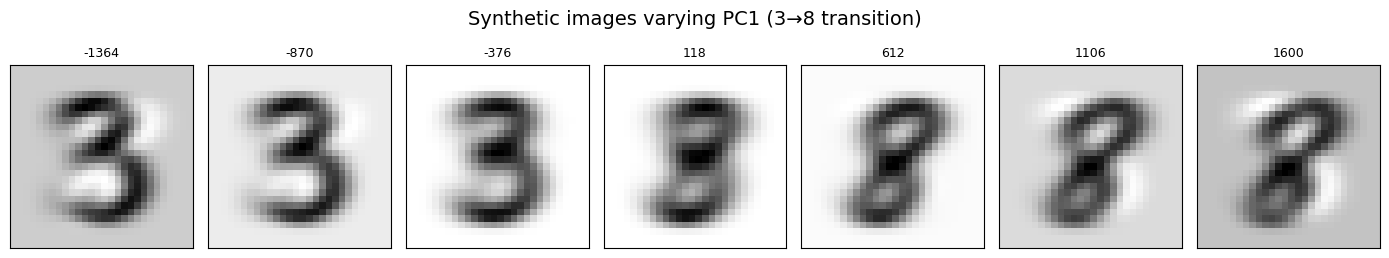

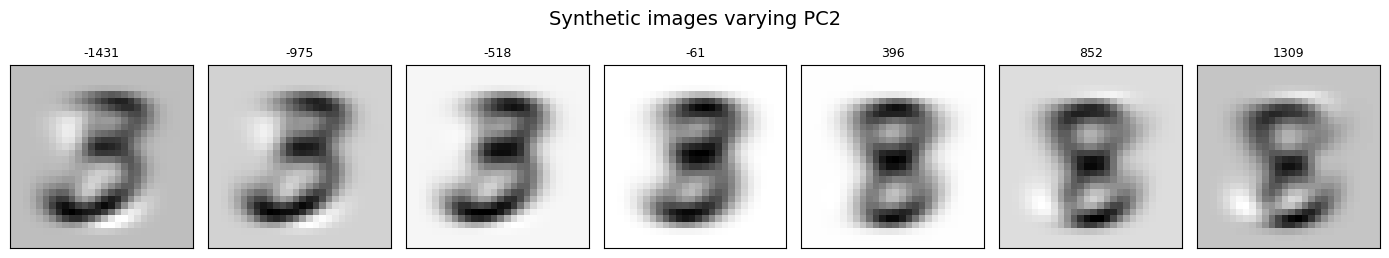

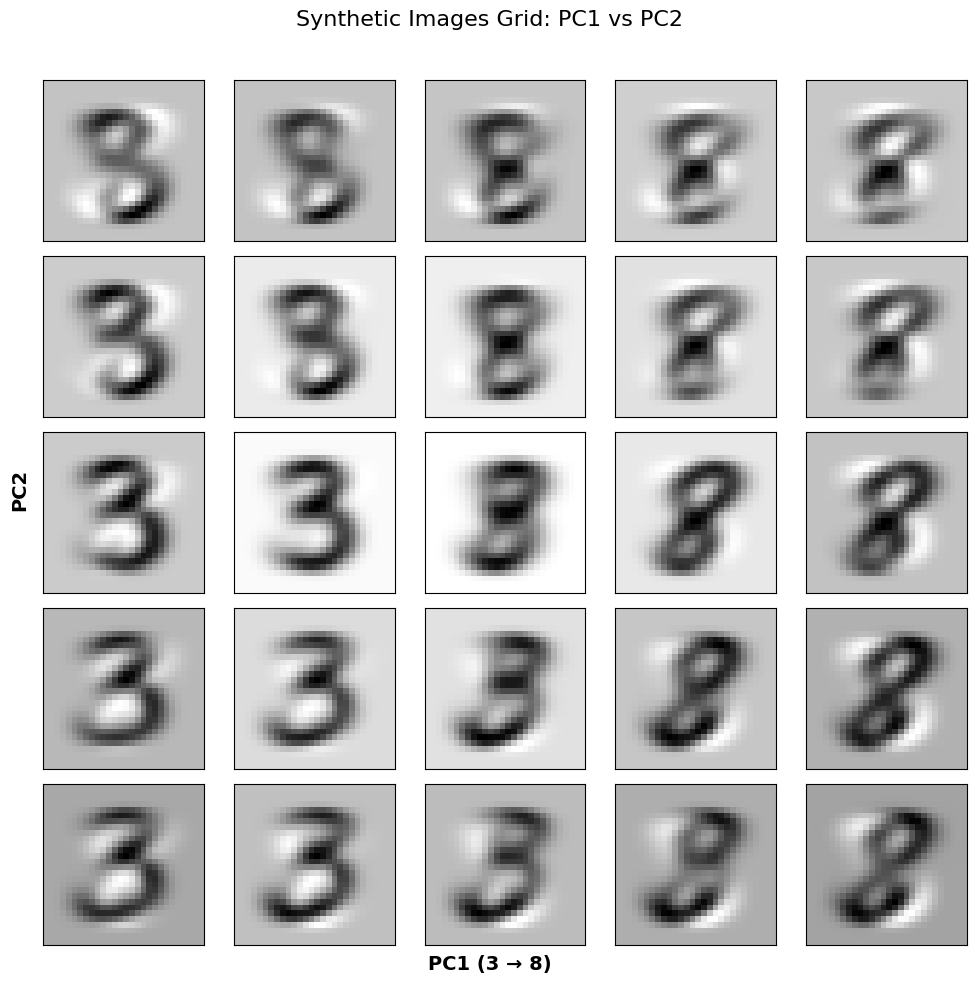

In [69]:
# Generate synthetic images varying PC1
weight1 = np.linspace(scores_twodigits[:, 0].min(), scores_twodigits[:, 0].max(), 7)
weight2 = 0

images_pc1 = np.zeros([len(weight1), D])
for count, w in enumerate(weight1):   
    images_pc1[count,:] = pca_digits.mean_ + pca_digits.components_[0,:]*w + pca_digits.components_[1,:]*weight2

fig, ax = plt.subplots(1, len(weight1), figsize=(14, 2.5))
for i in range(len(weight1)):
    ax[i].imshow(images_pc1[i,:].reshape((28,28)), cmap='gray_r')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f'{weight1[i]:.0f}', fontsize=9)
fig.suptitle('Synthetic images varying PC1 (3→8 transition)', fontsize=14, y=1.02)
fig.tight_layout()
plt.show()

# Generate synthetic images varying PC2
weight1 = 0
weight2 = np.linspace(scores_twodigits[:, 1].min(), scores_twodigits[:, 1].max(), 7)

images_pc2 = np.zeros([len(weight2), D])
for count, w in enumerate(weight2):   
    images_pc2[count,:] = pca_digits.mean_ + pca_digits.components_[0,:]*weight1 + pca_digits.components_[1,:]*w

fig, ax = plt.subplots(1, len(weight2), figsize=(14, 2.5))
for i in range(len(weight2)):
    ax[i].imshow(images_pc2[i,:].reshape((28,28)), cmap='gray_r')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f'{weight2[i]:.0f}', fontsize=9)
fig.suptitle('Synthetic images varying PC2', fontsize=14, y=1.02)
fig.tight_layout()
plt.show()

# Generate a 2D grid of synthetic images (varying both PC1 and PC2)
n_steps = 5
weights_pc1 = np.linspace(scores_twodigits[:, 0].min(), scores_twodigits[:, 0].max(), n_steps)
weights_pc2 = np.linspace(scores_twodigits[:, 1].min(), scores_twodigits[:, 1].max(), n_steps)

fig, axes = plt.subplots(n_steps, n_steps, figsize=(10, 10))

for i, w1 in enumerate(weights_pc1):
    for j, w2 in enumerate(weights_pc2):
        image = pca_digits.mean_ + pca_digits.components_[0,:]*w1 + pca_digits.components_[1,:]*w2
        axes[n_steps-1-j, i].imshow(image.reshape((28,28)), cmap='gray_r')
        axes[n_steps-1-j, i].set_xticks([])
        axes[n_steps-1-j, i].set_yticks([])

fig.text(0.5, 0.02, 'PC1 (3 → 8)', ha='center', fontsize=14, weight='bold')
fig.text(0.02, 0.5, 'PC2', va='center', rotation='vertical', fontsize=14, weight='bold')
fig.suptitle('Synthetic Images Grid: PC1 vs PC2', fontsize=16, y=0.98)
fig.tight_layout(rect=[0.03, 0.03, 1, 0.96])
plt.show()

PC1:

- Transitions from "3" to "8" (or vice versa)
- Captures the main structural difference: adding/removing the top loop
- This is the discriminative component that separates the two digit classes

PC2:

- Captures shared stylistic variations like thickness, roundness, or vertical compression
- Changes affect both digits similarly
- Less useful for classification but captures within-class variation

When PCA is applied to multiple classes, the first few components often capture between-class differences (what separates the classes) before capturing within-class variations. This makes PCA useful for both dimensionality reduction and feature extraction for classification.

# Kernel PCA <a id='kpca'></a>

Now, let's try using kernel PCA, which is available through sklearn's [`KernelPCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) transformer. As usual we start by creating our object and specifying parameters (see documentation to learn more about the optional parameters). Then, we use the methods `.fit()` and `.transform()` to fit the object and obtain the lower-dimensional representation.

In the code below, we use the radial basis function kernel, with the inverse bandwith parameter `gamma` set to 0.05. Setting, the option `fit_inverse_transform=True` will allow us to reconstruct the images later (and `alpha` is regularization used when inversing the transforming).

_Note:_ we first subsampled the data, as kernel PCA can be slow on large datasets.  

In [71]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Prepare data
y_twodigits = np.concatenate([
    np.full(len(X_digit3), 3),  # Label 3 for all digit 3 images
    np.full(len(X_digit8), 8)   # Label 8 for all digit 8 images
])
y_twodigits = y_twodigits.astype(int)
X_twodigits = MinMaxScaler().fit_transform(X_twodigits)

# Subsample the images (for speed)
X_twodigits_subsampled, X_twodigits_test, y_twodigits_subsampled, y_twodigits_test = train_test_split(
    X_twodigits, y_twodigits, stratify=y_twodigits, random_state=0, train_size=500, test_size=100
)

# Define our KPCA and PCA transformers
n_components = 10
kpca = KernelPCA(
    n_components=n_components, kernel="rbf", gamma=0.05, fit_inverse_transform=True, random_state=0, alpha=0.01)

pca = PCA(n_components=n_components)

# Fit and transform the data
scores_kpca = kpca.fit_transform(X_twodigits_subsampled)
scores_pca = pca.fit_transform(X_twodigits_subsampled)

Next, let's plot the images in the space of the first two components for both kernel PCA and standard PCA.

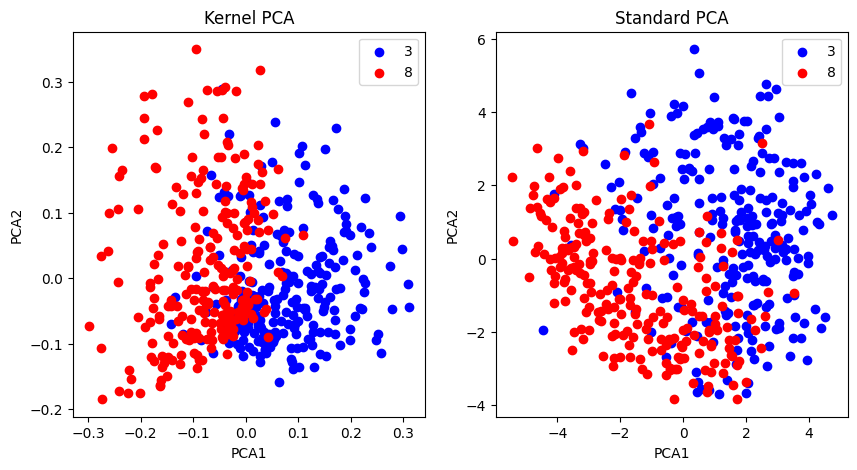

In [73]:
colors = {3: 'blue', 8: 'red'}

# Plot the images in the space of the first two components, colored by digit
i, j = 0, 1 #component indicies
yu =  [3,8] 
fig, ax = plt.subplots(1,2,figsize=(10, 5))
for dig in yu:
    ax[0].scatter(scores_kpca[y_twodigits_subsampled==dig,i], 
               scores_kpca[y_twodigits_subsampled==dig,j],
               c = colors[dig],label=dig)
    ax[1].scatter(scores_pca[y_twodigits_subsampled==dig,i], 
               scores_pca[y_twodigits_subsampled==dig,j],
               c = colors[dig],label=dig)
ax[0].legend()
ax[0].set_xlabel('PCA%d' % (i+1))
ax[0].set_ylabel('PCA%d' % (j+1))
ax[0].set_title('Kernel PCA')
ax[1].legend()
ax[1].set_xlabel('PCA%d' % (i+1))
ax[1].set_ylabel('PCA%d' % (j+1))
ax[1].set_title('Standard PCA')
plt.show()

### Image Denoising
Let's add some noise to our test images that weren't used in the fitting. We will then encode the noisy images into the latent space and then reconstruct our images, to see how well both methods are able to denoise the images.

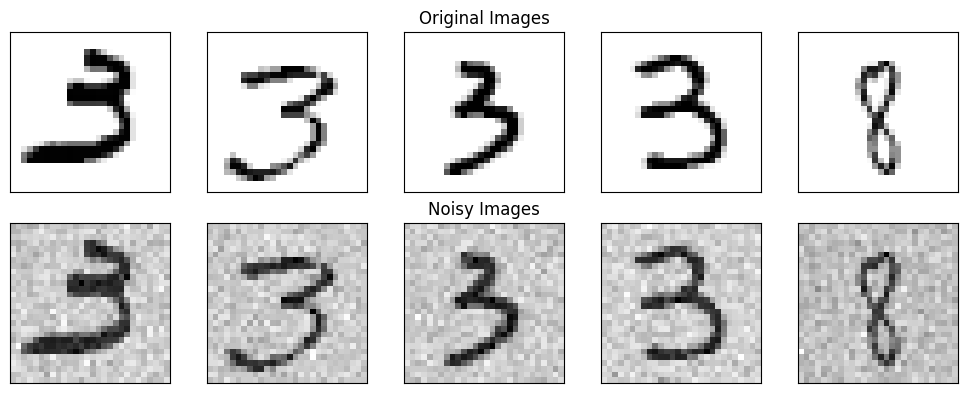

In [74]:
# Add noise to the test images
np.random.seed(0)
noise = np.random.normal(0, 0.1, X_twodigits_test.shape)
X_twodigits_test_noisy = X_twodigits_test + noise

# Plot some noisy test images
n_images = 5
fig, ax = plt.subplots(2,n_images,figsize=(2*n_images, 4))
for j in range(n_images):
    ax[0,j].imshow(X_twodigits_test[j].reshape((28,28)), cmap='gray_r')
    ax[1,j].imshow(X_twodigits_test_noisy[j].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
# Add titles
ax[0,2].set_title('Original Images')
ax[1,2].set_title('Noisy Images')
fig.tight_layout()

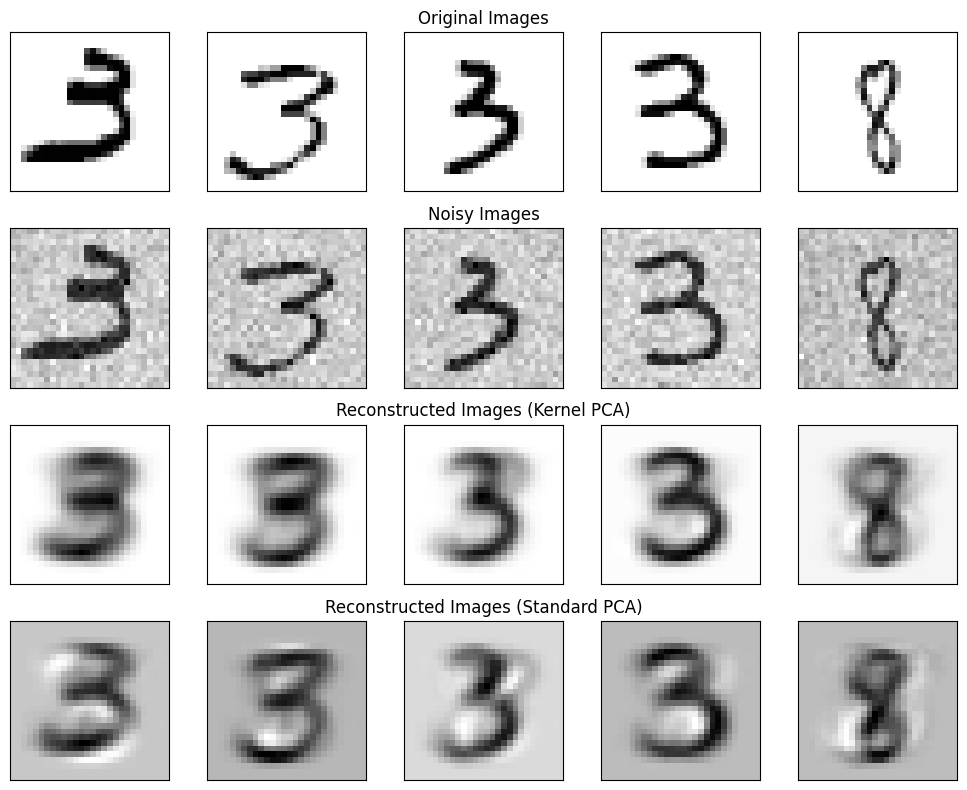

In [75]:
# Now transform the noisy test images using both PCA and KernelPCA
scores_kpca_test = kpca.transform(X_twodigits_test_noisy)
scores_pca_test = pca.transform(X_twodigits_test_noisy)

# And reconstruct the noisy test images using both PCA and KernelPCA
X_reconstructed_kpca = kpca.inverse_transform(
    scores_kpca_test)
X_reconstructed_pca = pca.inverse_transform(
    scores_pca_test)

# Plot some reconstructed images
n_images = 5
fig, ax = plt.subplots(4,n_images,figsize=(2*n_images, 8))
for j in range(n_images):
    ax[0,j].imshow(X_twodigits_test[j].reshape((28,28)), cmap='gray_r')
    ax[1,j].imshow(X_twodigits_test_noisy[j].reshape((28,28)), cmap='gray_r')
    ax[2,j].imshow(X_reconstructed_kpca[j].reshape((28,28)), cmap='gray_r')
    ax[3,j].imshow(X_reconstructed_pca[j].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
# Add titles
ax[0,2].set_title('Original Images')
ax[1,2].set_title('Noisy Images')
ax[2,2].set_title('Reconstructed Images (Kernel PCA)')
ax[3,2].set_title('Reconstructed Images (Standard PCA)')
fig.tight_layout()

### Exercise 15 (EXTRA)

a) Try changing the `gamma`. What happens when you increase, e.g. `gamma=0.1`? Or decrease `gamma=0.01`? 

b) Try changing the number of components. How does this affect the reconstructed images for both PCA and kernel PCA?

c) Which method would you prefer for this dataset?


a) Effect of Gamma:

- Low gamma (γ = 0.01):
    - Creates a very smooth, broad kernel
    - Points are mapped very similarly, losing detail
    - Less separation between digit classes
    - Behavior approaches linear PCA
    - Under-fitting: Can't capture complex patterns
- Medium gamma (γ = 0.05):
    - Balanced: good separation between classes
    - Captures non-linear structure without over-fitting
    - Clear clustering of digits 3 and 8
- High gamma (γ = 0.1, 0.5):
    - Creates narrow, peaked kernels
    - Each point becomes more isolated
    - Can lead to over-fitting
    - More scattered projections
    - May not generalise well to test data

b) Effect of Number of Components:

- Few components (2-5):
    - PCA: Blurry reconstructions, loses detail
    - KPCA: Also blurry, but may capture some non-linear features better
    - Both methods struggle with fine details
- Medium components (10-20):
    - PCA: Clear digit structure, reasonable quality
    - KPCA: Often better at capturing curved features
    - Good balance of compression and quality
- Many components (40-50):
    - PCA: Very good reconstruction, diminishing returns
    - KPCA: Can over-fit, reconstruction may be unstable
    - Minimal improvement over medium range

c) For MNIST dataset, I would prefer standard PCA, as linear PCA is simpler, computationally faster and the dataset does not have sufficiently high complexity to warrant the use of Kernel PCA (non-linear).

Kernel PCA might be better:

- If classes have complex non-linear boundaries that linear PCA cannot separate
- For datasets with inherently non-linear structure (e.g., Swiss roll, concentric circles)
- When separation in visualization is critical and linear methods fail

For MNIST, the improvements from KPCA do not justify the added computational cost and hyperparameter tuning complexity. Standard PCA with ~50-80 components works excellently for dimensionality reduction, visualisation, and pre-processing for classification.

# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please **change 'Student 1' and 'Student 2' at the top of the notebook to include your name(s)**. 

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [ ]:
# !jupyter nbconvert --to pdf mlp_week02_key.ipynb 